## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'<br>

---

# 2. 구 별 이동인구 분석
### 서울시 생활이동 정보를 기반으로 서울시 자치구 별 이동인구를 분석합니다

In [ ]:
# 필요 라이브러리를 설치합니다.
%pip install pandas seaborn

## 데이터 안내

[데이터 파일명]
* 2. seoul_moving.csv

[데이터 정보]
* 서울 시 구별 이동 2022년 4월 데이터

[데이터 컬럼 정보]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만(0~3)의 경우 * 처리

---

# 2.1.데이터 불러오기

#### [2.1.1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '2. seoul_moving.csv'파일을 'seoul_moving' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다
    * 데이터를 불러올 때 오류가 발생한다면, 오류에 대해 직접 검색하여 해결해보세요.

In [2]:
# 아래에 코드를 작성하고 결과를 확인합니다.
import sys
import numpy as np
import pandas as pd

In [4]:
seoul_moving = pd.read_csv('./csv/2. seoul_moving.csv', sep=',', encoding='UTF-8', index_col=0)

In [5]:
# 데이터 프레임의 Shape을 확인합니다.
np.shape(seoul_moving)

(28923054, 10)

---

# 2.2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [2.2.1] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head', 'tail' 등 전부 활용해 보세요.

In [6]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [7]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


In [8]:
# 아래에 코드를 작성하고 결과를 확인합니다.
# H 야간 상주지(추정 거주지) / W 주간 상주지(추정 근무지/학교) / E 기타지역
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [9]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_moving.tail()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
968458,202204,토,23,39000,11250,M,45,EH,50,3.16
968459,202204,토,23,39000,11250,M,50,EH,70,3.27
968460,202204,토,23,39000,11250,M,55,EE,50,3.31
968461,202204,토,23,39000,11250,M,55,EH,50,3.28
968462,202204,토,23,39000,11250,M,75,EH,30,5.94


* [참고] 1번 열의 의미
    * " 2022년 4월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [2.2.2] 결측치 처리 (NaN이 아닌 결측치 처리)

* '이동인구(합)' column은 이동 인구의 합산인데 숫자가 아닌 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만 즉, 값이 0~3일 경우 별표 * 처리)

    - 해당 값을 어떻게 처리하는 것이 좋을 지 생각해보아서 각자의 방법으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [10]:
# 이동인구(합) 컬럼의 값 별로 개수를 세어봅니다.
seoul_moving['이동인구(합)'].value_counts()

이동인구(합)
*          3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: count, Length: 135812, dtype: int64

In [11]:
# 별표(*)로 표현된 값을 대체합니다.
# 해당 값을 어떻게 처리하는 것이 좋을 지 생각해보아서 각자의 방법으로 변경하세요
#(ex: 최빈값, 평균값도 알 수 없으므로 0~3의 중위값인 1.5로 대체)
seoul_moving.loc[seoul_moving['이동인구(합)']=='*', '이동인구(합)'] = 1.5

In [12]:
# 이동인구(합) 컬럼의 값 별로 개수를 다시 세어봅니다.
seoul_moving['이동인구(합)'].value_counts()

이동인구(합)
1.5        3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: count, Length: 135812, dtype: int64

In [13]:
# 이제 이동인구(합) column의 데이터 타입을 바꿔주세요
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].astype(float)

In [14]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


#### [2.2.3] 이동유형, 요일, 성별 변수의 value수 파악

In [15]:
# 이동유형 컬럼의 값 별로 개수를 세어봅니다.
# H(야간상주지), W(주간상주지), E(기타)
seoul_moving['이동유형'].value_counts()

이동유형
EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: count, dtype: int64

In [16]:
# 요일 컬럼의 값 별로 개수를 세어봅니다.
seoul_moving.head()
seoul_moving['요일'].value_counts()

요일
토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: count, dtype: int64

* [참고] 2022년 4월의 요일 수는 다음과 같습니다.
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [17]:
# 성별 컬럼의 값 별로 개수를 세어봅니다.
seoul_moving['성별'].value_counts()

성별
M    16355029
F    12568025
Name: count, dtype: int64

#### [2.2.4] 심야 이동이 가장 많은 요일 확인

In [18]:
# 아래에 코드를 작성하고 결과를 확인합니다. 금요일!
# 심야시간은 0:00~ 4:59
temp = seoul_moving.loc[seoul_moving['도착시간'].isin([0, 1, 2, 3, 4]), ['요일', '도착시간']]
temp.groupby('요일')['도착시간'].count().reset_index(name='심야시간이동건수')

,요일,심야시간이동건수
0,금,359012
1,목,308651
2,수,303357
3,월,273062
4,일,331392
5,토,423995
6,화,292786


In [19]:
temp = seoul_moving.loc[seoul_moving['도착시간'].isin([0, 1, 2, 3, 4]), ['요일', '이동인구(합)']]
temp.groupby('요일')['이동인구(합)'].mean().reset_index(name='심야시간이동건수')

,요일,심야시간이동건수
0,금,11.716944
1,목,10.727892
2,수,10.559431
3,월,9.195832
4,일,10.714533
5,토,12.342599
6,화,10.366461


#### [2.2.5] 서울 지역의 데이터만 추출

* 서울시의 데이터만 필요하므로 출발과 도착이 모두 서울인 데이터만 추출하세요.
* 아래 사이트에서 서울시 데이터만 추출하기 위해 필요한 정보를 탐색해보세요. (ex. 자치구 코드 정보)
https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

In [20]:
# 출발 시군구 코드, 도착 시군구 코드 활용하여 출발과 도착이 모두 서울인 데이터만 추출해보세요.
seoul_code = list(range(11010, 11251, 10))
data = seoul_moving.loc[seoul_moving['출발 시군구 코드'].isin(seoul_code) & seoul_moving['도착 시군구 코드'].isin(seoul_code)]
data

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10
920411,202204,토,23,11250,11250,M,80,EH,10,28.36
920412,202204,토,23,11250,11250,M,80,EE,20,37.99
920413,202204,토,23,11250,11250,M,80,HE,10,9.42


#### [2.2.6] 서울지역의 구 별로 groupby하여 데이터를 확인해보세요. (유동인구 기준)

* 유출이 제일 많은 구는? 강남구

* 유입이 제일 많은 구는? 강남구

* 유출이 제일 적은 구는? 금천구

* 유입이 제일 적은 구는? 금천구

* [참고] 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [21]:
# 아래에 코드를 작성하고 결과를 확인합니다.
temp = data.loc[data['출발 시군구 코드'] != data['도착 시군구 코드']]
temp.groupby('출발 시군구 코드', as_index=False)['도착 시군구 코드'].count().sort_values(by='도착 시군구 코드', ascending=False)

,출발 시군구 코드,도착 시군구 코드
22,11230,526735
1,11020,469050
21,11220,464732
0,11010,457462
18,11190,455065
13,11140,444103
23,11240,422215
3,11040,413894
5,11060,410447
7,11080,408022


In [22]:
# 아래에 코드를 작성하고 결과를 확인합니다.
temp.groupby('도착 시군구 코드', as_index=False)['출발 시군구 코드'].count().sort_values(by='출발 시군구 코드', ascending=False)

,도착 시군구 코드,출발 시군구 코드
22,11230,507324
21,11220,454441
18,11190,450079
1,11020,444247
0,11010,436008
13,11140,435965
23,11240,421097
7,11080,414067
5,11060,410776
3,11040,409946


#### [2.2.7] 낮시간만 분석 대상에 넣기 위해 심야버스 제외

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [23]:
# 아래에 코드를 작성하고 결과를 확인합니다.
days = list(range(5, 24))
data = data.loc[data['도착시간'].isin(days)]
data

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,5,11010,11010,F,10,HE,10,5.96
1,202204,일,5,11010,11010,F,10,WH,10,5.88
2,202204,일,5,11010,11010,F,15,HE,10,4.06
3,202204,일,5,11010,11010,F,15,EW,10,4.06
4,202204,일,5,11010,11010,F,15,EH,10,10.08
...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10
920411,202204,토,23,11250,11250,M,80,EH,10,28.36
920412,202204,토,23,11250,11250,M,80,EE,20,37.99
920413,202204,토,23,11250,11250,M,80,HE,10,9.42


#### [2.2.8] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균과 합 도출

* groupby 사용, as_index=False로 설정해주세요

In [24]:
# '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)', '이동인구(합)'의 평균을 도출하여 seoul_moving_mean에 저장
seoul_moving_mean = data.groupby('도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].mean()
seoul_moving_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,21.349599,44.235978
1,11020,21.012462,44.516072
2,11030,21.364786,36.903883
3,11040,21.740324,42.685596
4,11050,22.474283,46.762548
5,11060,21.673451,39.942708
6,11070,23.412789,41.012753
7,11080,22.160283,45.816273
8,11090,23.811274,39.128470
9,11100,24.489976,37.882283


In [25]:
# '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)', '이동인구(합)'의 합을 도출하여 seoul_moving_sum에 저장
seoul_moving_sum = data.groupby('도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].sum()
seoul_moving_sum

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,9356120,19385709.60
1,11020,9306020,19715322.61
2,11030,8514380,14707082.87
3,11040,8887140,17449273.95
4,11050,8625540,17947278.99
5,11060,8838130,16288077.28
6,11070,7939300,13907465.59
7,11080,9072420,18757182.35
8,11090,7649610,12570412.30
9,11100,6995880,10821566.75


In [26]:
# 필요에 따라 column명을 데이터 의미에 맞게 적절히 변경하세요.
seoul_moving_mean.rename(columns={'이동인구(합)': '이동인구평균'}, inplace=True)
seoul_moving_sum.rename(columns={'평균 이동 시간(분)': '총 이동시간', '이동인구(합)': '총 이동인구'}, inplace=True)

In [27]:
# seoul_moving_mean, seoul_moving_sum을 합쳐보세요.
df = pd.merge(seoul_moving_mean, seoul_moving_sum)
df

,도착 시군구 코드,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구
0,11010,21.349599,44.235978,9356120,19385709.60
1,11020,21.012462,44.516072,9306020,19715322.61
2,11030,21.364786,36.903883,8514380,14707082.87
3,11040,21.740324,42.685596,8887140,17449273.95
4,11050,22.474283,46.762548,8625540,17947278.99
5,11060,21.673451,39.942708,8838130,16288077.28
6,11070,23.412789,41.012753,7939300,13907465.59
7,11080,22.160283,45.816273,9072420,18757182.35
8,11090,23.811274,39.128470,7649610,12570412.30
9,11100,24.489976,37.882283,6995880,10821566.75


In [30]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
df.to_csv('csv/df_seoul_moving.csv', index=False)

---

# 2.3.데이터 분석하기
+ 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별하세요.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [2.3.1] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

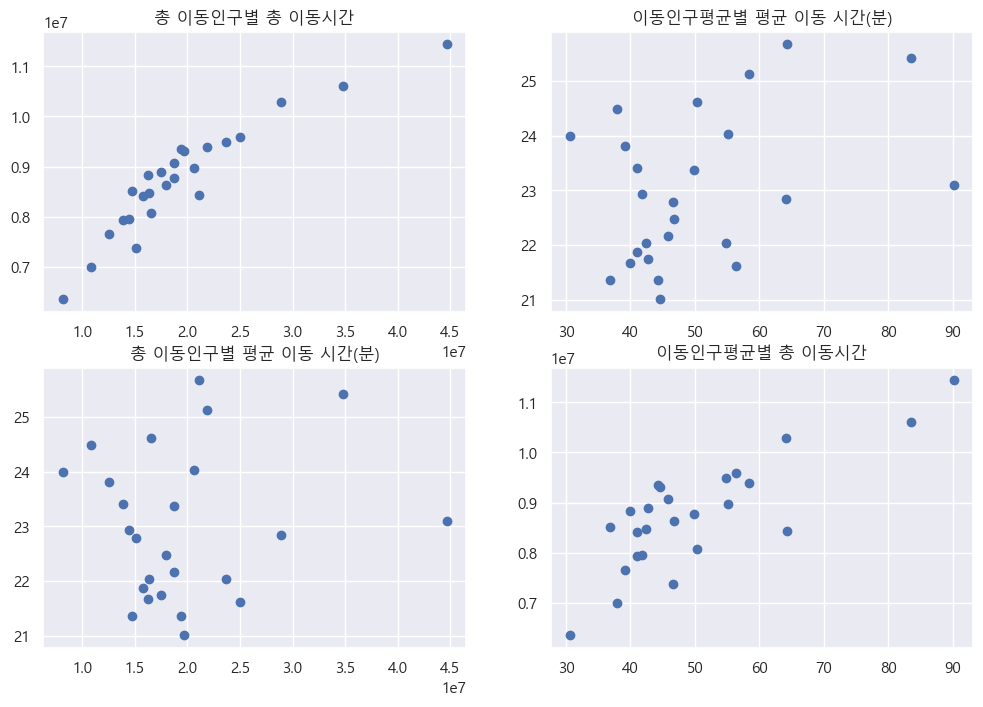

In [32]:
# 아래에 코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter('총 이동인구', '총 이동시간', data=df)
plt.title('총 이동인구별 총 이동시간')

plt.subplot(2, 2, 2)
plt.scatter('이동인구평균', '평균 이동 시간(분)', data=df)
plt.title('이동인구평균별 평균 이동 시간(분)')

plt.subplot(2, 2, 3)
plt.scatter('총 이동인구', '평균 이동 시간(분)', data=df)
plt.title('총 이동인구별 평균 이동 시간(분)')

plt.subplot(2, 2, 4)
plt.scatter('이동인구평균', '총 이동시간', data=df)
plt.title('이동인구평균별 총 이동시간')

plt.show()

In [33]:
# 아래에 코드를 작성하고 결과를 확인합니다.
print(spst.pearsonr(df['총 이동인구'], df['총 이동시간']))
print(spst.pearsonr(df['이동인구평균'], df['총 이동시간']))
print(spst.pearsonr(df['총 이동인구'], df['평균 이동 시간(분)']))
print(spst.pearsonr(df['이동인구평균'], df['평균 이동 시간(분)']))

PearsonRResult(statistic=0.9232983112844115, pvalue=4.896074716780721e-11)
PearsonRResult(statistic=0.8083131748107779, pvalue=1.0195987270470358e-06)
PearsonRResult(statistic=0.09572729335221279, pvalue=0.6489798433889893)
PearsonRResult(statistic=0.37309069339599177, pvalue=0.06622175286315453)


In [ ]:
# 아래에 코드를 작성하고 결과를 확인합니다.

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 이동인구평균이 증가할 수록 평균 이동 시간이 증가하는 경향이 있다.
# 2.
# 3.

---